In [5]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation
from ann_visualizer.visualize import ann_viz
import livelossplot
import keras

In [6]:
print(keras.__version__)
# data loading
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# data preprocessing
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.



2.2.0


In [7]:
plot_losses = livelossplot.PlotLossesKeras()

In [8]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy', 
              metrics=['accuracy', 'mean_squared_error'])

In [9]:
model.summary()
#ann_viz(model, title="")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


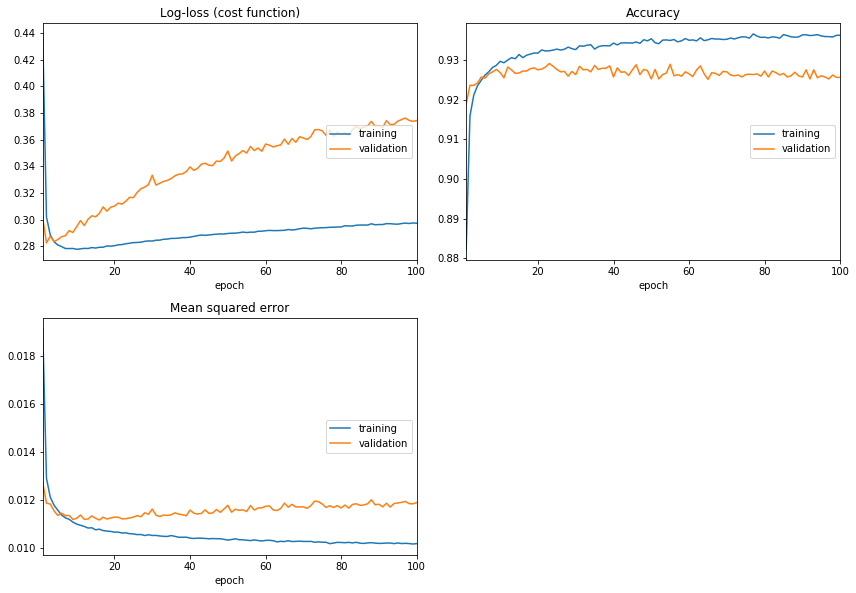

In [10]:
model.fit(X_train, Y_train,
          epochs=100, verbose=0, validation_data=(X_test, Y_test),  callbacks=[plot_losses])